<a href="https://colab.research.google.com/github/HoanDiep/BT4_Fuzzy_Tri_tue_nhan_tao/blob/main/bt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

0.560344827586207


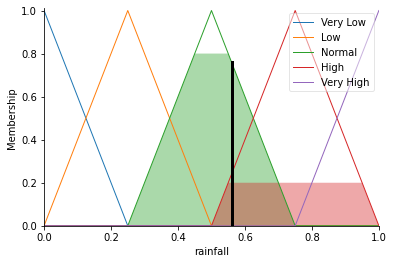

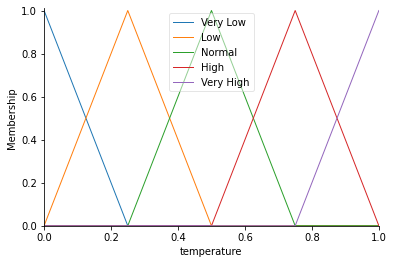

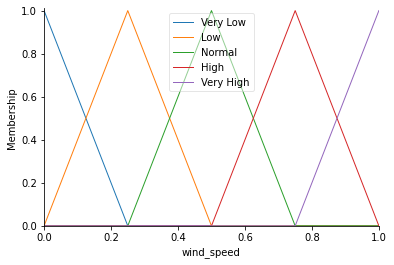

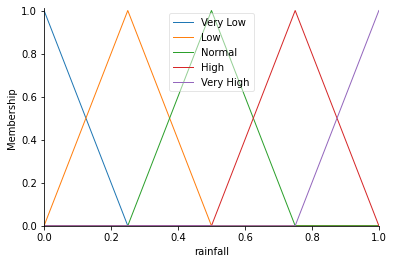

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import membership

value = np.arange(0.0, 1.01, 0.01)

temperature = ctrl.Antecedent(value,'temperature') 
wind_speed = ctrl.Antecedent(value,'wind_speed')
rainfall = ctrl.Consequent(value, 'rainfall')


temperature['Very Low']        = fuzz.trimf(value, [0.0, 0.0, 0.25])
temperature['Low']    = fuzz.trimf(value, [0.0, 0.25, 0.5])
temperature['Normal']      = fuzz.trimf(value, [0.25, 0.5, 0.75])
temperature['High'] = fuzz.trimf(value, [0.5, 0.75, 1.0])
temperature['Very High'] = fuzz.trimf(value, [0.75, 1, 1.0])

wind_speed['Very Low']        = fuzz.trimf(value, [0.0, 0.0, 0.25])
wind_speed['Low']    = fuzz.trimf(value, [0.0, 0.25, 0.5])
wind_speed['Normal']      = fuzz.trimf(value, [0.25, 0.5, 0.75])
wind_speed['High'] = fuzz.trimf(value, [0.5, 0.75, 1.0])
wind_speed['Very High'] = fuzz.trimf(value, [0.75, 1, 1.0])

rainfall['Very Low']        = fuzz.trimf(value, [0.0, 0.0, 0.25])
rainfall['Low']    = fuzz.trimf(value, [0.0, 0.25, 0.5])
rainfall['Normal']      = fuzz.trimf(value, [0.25, 0.5, 0.75])
rainfall['High'] = fuzz.trimf(value, [0.5, 0.75, 1.0])
rainfall['Very High'] = fuzz.trimf(value, [0.75, 1, 1.0])

rule1 = ctrl.Rule(wind_speed['Very Low'] & temperature['Very Low'], rainfall['Very Low'])                             
rule2 = ctrl.Rule(wind_speed['Very Low'] & temperature['Low'], rainfall['Very Low'])
rule3 = ctrl.Rule(wind_speed['Very Low'] & temperature['Normal'], rainfall['Low'])
rule4 = ctrl.Rule(wind_speed['Very Low'] & temperature['High'], rainfall['Low'])
rule5 = ctrl.Rule(wind_speed['Very Low'] & temperature['Very High'], rainfall['Low'])

rule6 = ctrl.Rule(wind_speed['Low'] & temperature['Very Low'], rainfall['Very Low'])                                        
rule7 = ctrl.Rule(wind_speed['Low'] & temperature['Low'], rainfall['Very Low'])                                    
rule8 = ctrl.Rule(wind_speed['Low'] & temperature['Normal'], rainfall['Low'])
rule9 = ctrl.Rule(wind_speed['Low'] & temperature['High'], rainfall['Low'])
rule10 = ctrl.Rule(wind_speed['Low'] & temperature['Very High'], rainfall['Normal'])

rule11 = ctrl.Rule(wind_speed['Normal'] & temperature['Very Low'], rainfall['Very Low'])
rule12 = ctrl.Rule(wind_speed['Normal'] & temperature['Low'], rainfall['Low'])
rule13 = ctrl.Rule(wind_speed['Normal'] & temperature['Normal'], rainfall['Normal'])
rule14 = ctrl.Rule(wind_speed['Normal'] & temperature['High'], rainfall['Normal'])
rule15 = ctrl.Rule(wind_speed['Normal'] & temperature['Very High'], rainfall['High'])

rule16 = ctrl.Rule(wind_speed['High'] & temperature['Very Low'], rainfall['Low'])
rule17 = ctrl.Rule(wind_speed['High'] & temperature['Low'], rainfall['Normal'])
rule18 = ctrl.Rule(wind_speed['High'] & temperature['Normal'], rainfall['Normal'])
rule19 = ctrl.Rule(wind_speed['High'] & temperature['High'], rainfall['High'])
rule20 = ctrl.Rule(wind_speed['High'] & temperature['Very High'], rainfall['High'])                                       

rule21 = ctrl.Rule(wind_speed['Very High'] & temperature['Very Low'], rainfall['Normal'])
rule22 = ctrl.Rule(wind_speed['Very High'] & temperature['Low'], rainfall['Normal'])
rule23 = ctrl.Rule(wind_speed['Very High'] & temperature['Normal'], rainfall['High'])                                    
rule24 = ctrl.Rule(wind_speed['Very High'] & temperature['High'], rainfall['Very High'])
rule25 = ctrl.Rule(wind_speed['Very High'] & temperature['Very High'], rainfall['Very High'])                             

rain_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rain_predict = ctrl.ControlSystemSimulation(rain_ctrl)

rain_predict.inputs({'temperature': 0.5, 'wind_speed': 0.8})

rain_predict.compute()
print(rain_predict.output['rainfall'])
rainfall.view(sim=rain_predict)

temperature.view()
wind_speed.view()
rainfall.view()

